<img src="../LogoUTN.jpg" align="right" width="150" /> 

### Procesamiento Digital de Señales - 2024

# Trabajo Práctico Nº2: Algoritmo para calcular la DFT
### Juan Manuel Ronchetti

## Enunciado
Desarrollar un algoritmo que calcule la transformada discreta de Fourier (DFT):

\begin{equation} X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2 \pi}{N} kn} \end{equation}

Bonus:
* Probar las mismas experiencias con la transformada rapida de Fourier.
* Calcular la DFT de una señal aleatoria, por ejemplo ruido uniforme de varianza σ² = 4.

## Resolucion

In [1]:
# -------------------------------------------------------------------------------
#                                   Imports
# -------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

# -------------------------------------------------------------------------------
#                                   Generador de señales
# -------------------------------------------------------------------------------

def my_signal_generator( ff, nn, fs, vmax = 1, dc = 0, ph = 0):
    
    # Tiempo de muestreo
    ts = 1/fs
    
    # Sampleo temporal
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()

    aux = vmax * np.sin( 2*np.pi*ff*tt + ph ) + dc
    xx = aux.reshape(nn,1)
                        
    return (tt, xx)

In [2]:
# -------------------------------------------------------------------------------
#                                   Algoritmo DFT
# -------------------------------------------------------------------------------
def my_DFT(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    
    for k in range(N):
        sum = 0
        for n in range(N):
            angle = 2 * np.pi * k * n / N
            sum += x[n] * (np.cos(angle) - 1j * np.sin(angle))
        X[k] = sum
    
    return X

## Implementacion

In [3]:
# -------------------------------------------------------------------------------
#                                   Genero las funciones
# -------------------------------------------------------------------------------
fs = 9
N = 9 
ff = 1 

tt, xx = my_signal_generator(  ff = ff, nn = N, fs = fs )

frecs = np.fft.fftfreq(N, d=1/fs)

# DFT
start_time = time.time()

XX_dft = my_DFT(xx)
XX_dft_abs = np.abs(XX_dft)

dft_time = time.time() - start_time

# FFT
start_time = time.time()

XX_fft = np.fft.fft(xx, n=N, axis=0)
XX_fft_abs = np.abs(XX_fft)

fft_time = time.time() - start_time

Text(0, 0.5, 'Magnitud')

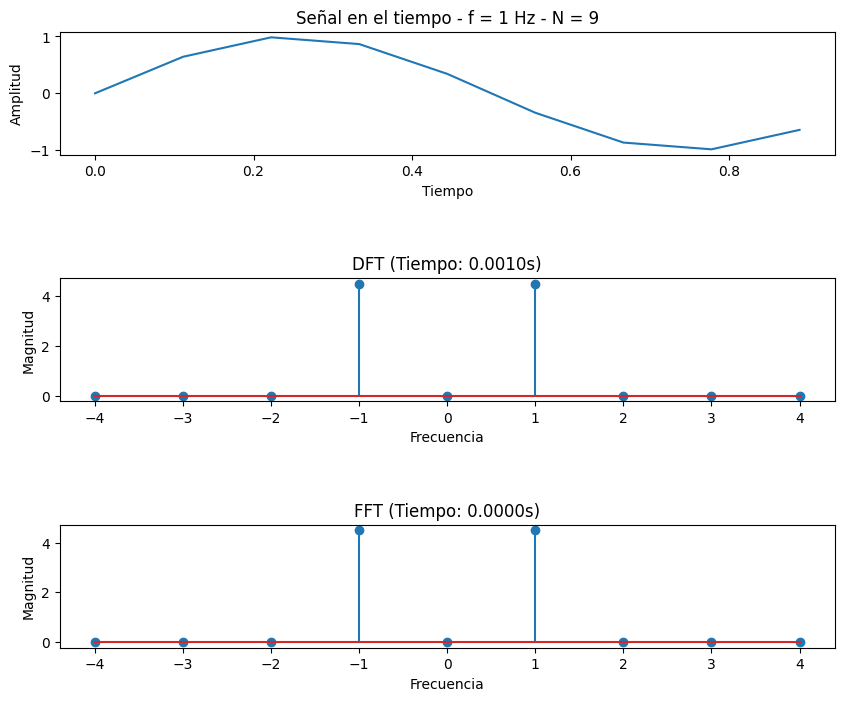

In [4]:
# -------------------------------------------------------------------------------
#                                   Graficos
# -------------------------------------------------------------------------------
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=1) 

# Senial
axs[0].plot(tt, xx)
axs[0].set_title('Señal en el tiempo - f = 1 Hz - N = 9')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')

# DFT
axs[1].stem(frecs, XX_dft_abs , label='DFT')
axs[1].set_title(f'DFT (Tiempo: {dft_time:.4f}s)')
axs[1].set_xlabel('Frecuencia')
axs[1].set_ylabel('Magnitud')

# FFT
axs[2].stem(frecs, XX_fft_abs , label='FFT')
axs[2].set_title(f'FFT (Tiempo: {fft_time:.4f}s)')
axs[2].set_xlabel('Frecuencia')
axs[2].set_ylabel('Magnitud')

In [5]:
# -------------------------------------------------------------------------------
#                                   Genero las funciones
# -------------------------------------------------------------------------------
fs = 1000
N = 1024 
ff = 200 

tt, xx = my_signal_generator(  ff = ff, nn = N, fs = fs )

frecs = np.fft.fftfreq(N, d=1/fs)

# DFT
start_time = time.time()

XX_dft = my_DFT(xx)
XX_dft_abs = np.abs(XX_dft)

dft_time = time.time() - start_time

# FFT
start_time = time.time()

XX_fft = np.fft.fft(xx, n=N, axis=0)
XX_fft_abs = np.abs(XX_fft)

fft_time = time.time() - start_time

Text(0, 0.5, 'Magnitud')

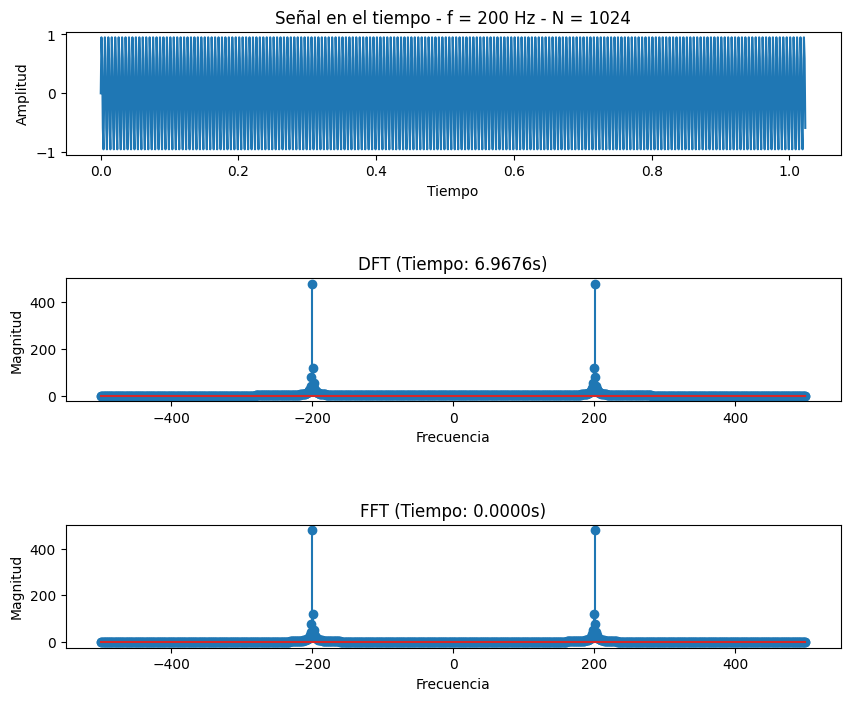

In [6]:
# -------------------------------------------------------------------------------
#                                   Graficos
# -------------------------------------------------------------------------------
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=1) 

# Senial
axs[0].plot(tt, xx)
axs[0].set_title('Señal en el tiempo - f = 200 Hz - N = 1024')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')

# DFT
axs[1].stem(frecs, XX_dft_abs , label='DFT')
axs[1].set_title(f'DFT (Tiempo: {dft_time:.4f}s)')
axs[1].set_xlabel('Frecuencia')
axs[1].set_ylabel('Magnitud')

# FFT
axs[2].stem(frecs, XX_fft_abs , label='FFT')
axs[2].set_title(f'FFT (Tiempo: {fft_time:.4f}s)')
axs[2].set_xlabel('Frecuencia')
axs[2].set_ylabel('Magnitud')

## Implementacion con señal de ruido aleatorio

In [7]:
# -------------------------------------------------------------------------------
#                                   Genero las funciones
# -------------------------------------------------------------------------------
N = 1025
varianza = 4 

# Varianza de una distribucion normal
rango = np.sqrt(12 * varianza)
a = -rango / 2
b = rango / 2

# Ruido
xx_noise = np.random.uniform(a, b, N)

tt_noise = np.linspace(0, 1, N, endpoint=False)
frecs = np.fft.fftfreq(N)

# DFT
start_time = time.time()

XX_dft_noise = my_DFT(xx_noise)
XX_dft_abs_noise = np.abs(XX_dft_noise)

dft_time = time.time() - start_time

# FFT
start_time = time.time()

XX_fft_noise = np.fft.fft(xx_noise, n=N, axis=0)
XX_fft_abs_noise = np.abs(XX_fft_noise)

fft_time = time.time() - start_time

Text(0, 0.5, 'Magnitud')

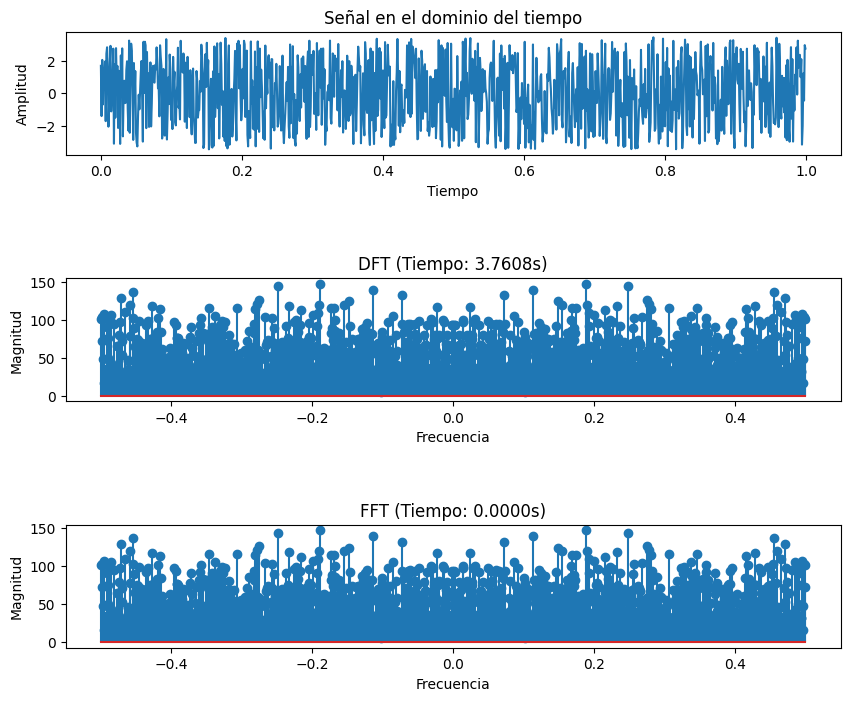

In [8]:
# -------------------------------------------------------------------------------
#                                   Graficos
# -------------------------------------------------------------------------------
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=1) 

# Senial
axs[0].plot(tt_noise, xx_noise)
axs[0].set_title('Señal en el dominio del tiempo')
axs[0].set_xlabel('Tiempo')
axs[0].set_ylabel('Amplitud')

# DFT
axs[1].stem(frecs, XX_dft_abs_noise , label='DFT')
axs[1].set_title(f'DFT (Tiempo: {dft_time:.4f}s)')
axs[1].set_xlabel('Frecuencia')
axs[1].set_ylabel('Magnitud')

# FFT
axs[2].stem(frecs, XX_fft_abs_noise , label='FFT')
axs[2].set_title(f'FFT (Tiempo: {fft_time:.4f}s)')
axs[2].set_xlabel('Frecuencia')
axs[2].set_ylabel('Magnitud')

## Conclusion
Se ha creado una funcion en python que realiza el algoritmo de calculo de la Transformada Discreta de Fourier.
Se ha implementado el algoritmo con funciones senoidales y funciones de ruido aleatorio, comparando el resultado con la funcion fft de la libreria numpy. Se verifica que el algoritmo de la FFT es mucho mas veloz que el de la DFT.